In [3]:
import glob
import os
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpl_image
%matplotlib inline  
import cv2
import errno

In [4]:
!jupyter nbextension enable --py --sys-prefix widgetsnbextension
def log_progress(sequence, title='', every=1, size=None, end_msg='', removeAtTheEnd=False):
    from ipywidgets import IntProgress, HTML, VBox
    from IPython.display import display

    is_iterator = False
    if size is None:
        try:
            size = len(sequence)
        except TypeError:
            is_iterator = True
    if size is not None:
        if every is None:
            if size <= 200:
                every = 1
            else:
                every = int(size / 200)     # every 0.5%
    else:
        assert every is not None, 'sequence is iterator, set every'

    if is_iterator:
        progress = IntProgress(min=0, max=1, value=1)
        progress.bar_style = 'info'
    else:
        progress = IntProgress(min=0, max=size, value=0)
    label = HTML()
    box = VBox(children=[label, progress])
    display(box)

    index = 0
    try:
        for index, record in enumerate(sequence, 1):
            if index == 1 or index % every == 0:
                if is_iterator:
                    label.value = '{index} / ?'.format(index=index)
                else:
                    progress.value = index
                    if isinstance(sequence, dict):
                        val = ''
                    else:
                        val=sequence[index-1]
                            
                    label.value = u'{title} : {value} ({index} / {size})'.format(
                        title=title,
                        value=val,
                        index=index,
                        size=size
                    )
            yield record
    except:
        progress.bar_style = 'danger'
        raise
    else:
        progress.bar_style = 'success'
        progress.value = index
        label.value = end_msg
        if removeAtTheEnd:
            box.close()
    

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [5]:
pathBasic='/home/jguerry/workspace/datasets/ONERA.ROOM'
allFolders=sorted(glob.glob(pathBasic+"/RGBD/*"))

In [6]:
pathFolder ='2017-04-26-14-06-49' #static, with light change
    

## Computing mean

In [7]:
folder='/home/jguerry/workspace/datasets/ONERA.ROOM/RGBD/'+pathFolder
print folder
print 'Globing...'
imgs_rgb=sorted(glob.glob(folder+"/image/*"))
print 'Globbed'

means=np.zeros((len(imgs_rgb),1))
filenames=[]

print 'Evaluating set...'
for i in log_progress(range(len(imgs_rgb)),title='Images', end_msg='Finished !'): 
    img=cv2.imread(imgs_rgb[i])
    mean=img.mean()
    
    
    fileName_rgb = os.path.split(os.path.split(imgs_rgb[i])[-1])[-1]
    newfileName_rgb = pathFolder+'_'+fileName_rgb[:-4]
    
    means[i]=mean
    filenames.append(newfileName_rgb)
print 'Finished.'

/home/jguerry/workspace/datasets/ONERA.ROOM/RGBD/2017-04-26-14-06-49
Globing...
Globbed
Evaluating set...


Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"


Finished.


## Plotting evolution of mean luminosity

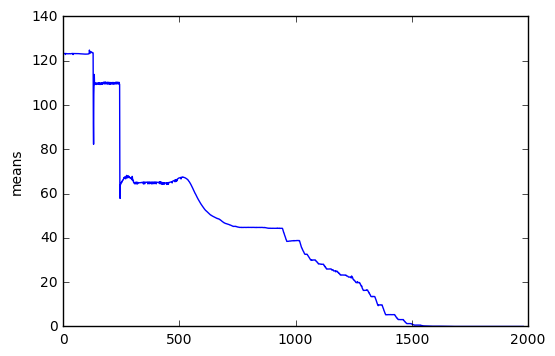

In [8]:
plt.plot(means)
plt.ylabel('means')
plt.show()

## Selecting images

Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"


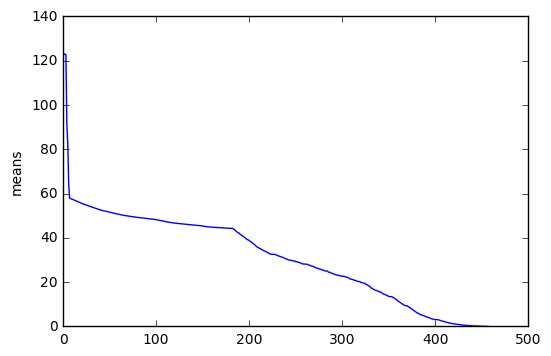

Selected points : 458


In [9]:
resolution = 10000.

mean_max = np.max(means)
mean_min = np.min(means)

delta=mean_max-mean_min
step=delta/resolution
steps = np.arange(mean_max,mean_min,-step)

selected_x=[]
last_x=0
last_intensity=1000
for intensity in log_progress(steps,title='Intensity steps', end_msg='Finished !'): 
    last_x=0
#     last_intensity=1000
    for x in range(last_x,len(means)):
        last_x=x
        if means[x]<intensity and intensity<last_intensity:
            selected_x.append(x)
            last_intensity=means[x]
            break
            
            
plt.plot(means[selected_x])
# plt.plot(selected_x)
plt.ylabel('means')
plt.show()

print 'Selected points :',len(selected_x)

#### Matplotlib style

In [23]:
ratio=0.0

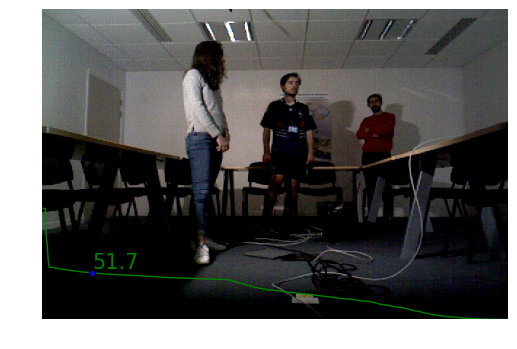

In [112]:
ratio+=0.05
indice=int(ratio*len(selected_x))
path_img = imgs_rgb[selected_x[indice]]
mean_img = means[selected_x[indice],0]
im = mpl_image.imread(path_img)


nb_pts=len(selected_x)
width_of_im = 640/640*nb_pts
height_of_im = 480./640*nb_pts



fig, ax = plt.subplots()
ax.imshow(im, aspect='auto', extent=(0, width_of_im, 0,height_of_im ), zorder=-1)
plt.axis('off')
# ax.yaxis.tick_left()
# ax.tick_params(axis='y', colors='black', labelsize=15)
# ax.tick_params(axis='x', colors='black', labelsize=15)
# ax.grid(b=False, which='major', color='#D3D3D3', linestyle='-')

if ratio<0.5:
    verticalalignment='bottom'
    horizontalalignment='left'
else:
    verticalalignment='bottom'
    horizontalalignment='right'
ax.text(indice, mean_img,'{:.1f}'.format(mean_img), fontsize=15,color='green',verticalalignment=verticalalignment, horizontalalignment=horizontalalignment)
plt.plot(means[selected_x],alpha=1.0,color='green')
ax.scatter(indice,mean_img, alpha=1.0,zorder=+4)

ax = plt.gca();
ax.set_xlim(0.0, width_of_im);
ax.set_ylim(0, height_of_im);
# plt.savefig( '/tmp/match.png',bbox_inches='tight', transparent="True",pad_inches=0)


plt.show()

#### OpenCV style

In [229]:
color_aoe=(0,125,0) #ao english
color_bg=(int(255*0.38),int(255*0.71),int(255*0.48)) #bud green 48%	71%	38% 
color_bo=(int(255*0.0),int(255*0.33),int(255*0.80)) #Burnt Orange	#CC5500	80%	33%	0%
color_cp=(int(255*0.80),int(255*0.73),int(255*0.94)) #Cameo Pink	#EFBBCC	94%	73%	80%

In [94]:
ratio=0.00

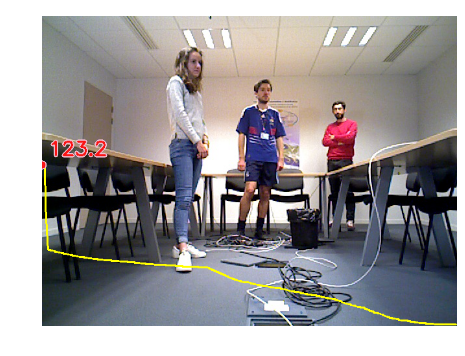

In [234]:
ratio+=0.05
ratio=0.0
offset_v = 2
coeff_v = 2
color_line=(0,255,255)
color_point_bg=color_cp
color_point=(20,20,250) #red




indice=int(ratio*len(selected_x))
path_img = imgs_rgb[selected_x[indice]]
mean_img = means[selected_x[indice],0]
im = cv2.imread(path_img)
nb_pts=len(selected_x)
w = im.shape[1]
h = im.shape[0]

for i in range(len(selected_x)-1):
    
    x0 = int(640./len(selected_x)*i)
    y0 = int(h-coeff_v*means[selected_x[i],0]-offset_v)
    x1 = int(640./len(selected_x)*(i+1))
    y1 = int(h-coeff_v*means[selected_x[i+1],0]-offset_v)
    cv2.line(im,(x0,y0),(x1,y1),color_line,2)#,lineType=8)



x_c = int(640./len(selected_x)*indice)
y_c = int(h-coeff_v*means[selected_x[indice],0]-offset_v)
text='{:.1f}'.format(mean_img)

cv2.circle(im, (x_c,y_c), 7, color_point_bg,thickness=-1)    
cv2.circle(im, (x_c,y_c), 5, color_point,thickness=-1)    
if ratio<0.8:
    cv2.putText(im, text, (x_c+10,y_c-15), cv2.FONT_HERSHEY_SCRIPT_SIMPLEX, fontScale=1, thickness=5, color=color_point_bg)
    cv2.putText(im, text, (x_c+10,y_c-15), cv2.FONT_HERSHEY_SCRIPT_SIMPLEX, fontScale=1, thickness=2, color=color_point)
else:
    
    cv2.putText(im, text, (x_c-50,y_c-15), cv2.FONT_HERSHEY_SCRIPT_SIMPLEX, fontScale=1, thickness=5, color=color_point_bg)
    cv2.putText(im, text, (x_c-50,y_c-15), cv2.FONT_HERSHEY_SCRIPT_SIMPLEX, fontScale=1, thickness=3, color=color_point)

    
cv2.imwrite('/tmp/match.png',im)
    
    
fig, ax = plt.subplots()
plt.axis('off')
plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))

## Making the set

In [239]:
f = open('/home/jguerry/workspace/datasets/ONERA.ROOM/data_pv/sets/static_monotonous.txt', 'w')
for i in selected_x:      
    fileName_rgb = os.path.split(os.path.split(imgs_rgb[i])[-1])[-1]
    newfileName_rgb = pathFolder+'_'+fileName_rgb[:-4]
    f.write(newfileName_rgb+'\n')
print 'Finished.'
f.close()

Finished.


48.2104752604


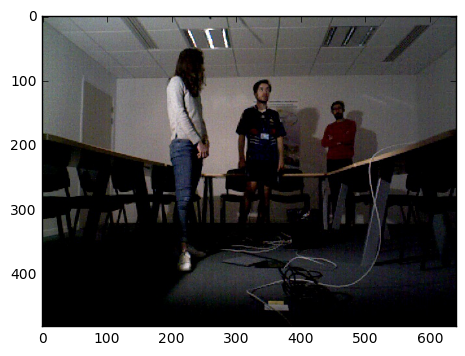

In [240]:
img=cv2.imread(imgs_rgb[selected_x[100]])
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
print(img.mean())

## Loading network

In [241]:
import os
import torch
import cv2
import cPickle
import numpy as np
import errno

from faster_rcnn import network
from faster_rcnn.faster_rcnn import FasterRCNN, RPN
from faster_rcnn.utils.timer import Timer
from faster_rcnn.fast_rcnn.nms_wrapper import nms

from faster_rcnn.fast_rcnn.bbox_transform import bbox_transform_inv, clip_boxes
from faster_rcnn.datasets.factory import get_imdb
from faster_rcnn.fast_rcnn.config import cfg, cfg_from_file, get_output_dir

def mkdir_p(path):
    try:
        os.makedirs(path)
    except OSError as exc:  # Python >2.5
        if exc.errno == errno.EEXIST and os.path.isdir(path):
            pass
        else:
            raise
            

In [246]:
# hyper-parameters
# ------------
# pytorchpath = '/data02/jguerry/jg_pyt/'
pytorchpath = '/home/jguerry/workspace/jg_dl/jg_pyt/'

imdb_name = 'oneraroom_static_monotonous_depth_8bits'
imdb_model = 'inout_train_Images'
save_name = imdb_model+'_on_'+imdb_name
trained_model = pytorchpath+'models/'+imdb_model+'/faster_rcnn_10000.h5'



output_dir = pytorchpath+'output/faster_rcnn_oneraroom_exp/'
output_dir_detections = output_dir+imdb_name+'/detections_'+save_name+'/'
det_file = output_dir+imdb_name+'/detections_'+save_name+'.pkl'

mkdir_p(output_dir_detections)




cfg_file = pytorchpath+'experiments/cfgs/faster_rcnn_end2end_oneraroom.yml'
rand_seed = 1024


max_per_image = 300
thresh = 0.05
vis = True
sav = True

# ------------

if rand_seed is not None:
    np.random.seed(rand_seed)

if rand_seed is not None:
    np.random.seed(rand_seed)

# load config
cfg_from_file(cfg_file)

In [242]:
def vis_detections(im, class_name, dets, thresh=0.8):
    """Visual debugging of detections."""
    if 'epth' in imdb_name:
        cv2.normalize(im, im, 0, 255, cv2.NORM_MINMAX)
    for i in range(np.minimum(10, dets.shape[0])):
        bbox = tuple(int(np.round(x)) for x in dets[i, :4])
        score = dets[i, -1]
        if score > thresh:
            cv2.rectangle(im, bbox[0:2], bbox[2:4], (255, 0, 0), 4)
            cv2.putText(im, '%s: %.3f' % (class_name, score), (bbox[0], bbox[1] + 15), cv2.FONT_HERSHEY_PLAIN,
                        1.0, (0, 0, 255), thickness=1)
    return im


def im_detect(net, image):
    """Detect object classes in an image given object proposals.
    Returns:
        scores (ndarray): R x K array of object class scores (K includes
            background as object category 0)
        boxes (ndarray): R x (4*K) array of predicted bounding boxes
    """

    im_data, im_scales = net.get_image_blob(image)
    im_info = np.array(
        [[im_data.shape[1], im_data.shape[2], im_scales[0]]],
        dtype=np.float32)

    cls_prob, bbox_pred, rois = net(im_data, im_info)
    scores = cls_prob.data.cpu().numpy()
    boxes = rois.data.cpu().numpy()[:, 1:5] / im_info[0][2]

    if cfg.TEST.BBOX_REG:
        # Apply bounding-box regression deltas
        box_deltas = bbox_pred.data.cpu().numpy()
        pred_boxes = bbox_transform_inv(boxes, box_deltas)
        pred_boxes = clip_boxes(pred_boxes, image.shape)
    else:
        # Simply repeat the boxes, once for each class
        pred_boxes = np.tile(boxes, (1, scores.shape[1]))

    return scores, pred_boxes


def test_net(net, imdb, max_per_image=300, thresh=0.05, vis=False):
    """Test a Fast R-CNN network on an image database."""
    num_images = len(imdb.image_index)
    # all detections are collected into:
    #    all_boxes[cls][image] = N x 5 array of detections in
    #    (x1, y1, x2, y2, score)
    all_boxes = [[[] for _ in xrange(num_images)]
                 for _ in xrange(imdb.num_classes)]

    # output_dir = get_output_dir(imdb, name)

    # timers
    _t = {'im_detect': Timer(), 'misc': Timer()}
    # det_file = os.path.join(output_dir, 'detections.pkl')

    for i in range(num_images):

        im = cv2.imread(imdb.image_path_at(i))
        _t['im_detect'].tic()
        scores, boxes = im_detect(net, im)
        detect_time = _t['im_detect'].toc(average=False)

        _t['misc'].tic()
        if vis or sav:
            # im2show = np.copy(im[:, :, (2, 1, 0)])
            im2show = np.copy(im)

        # skip j = 0, because it's the background class
        for j in xrange(1, imdb.num_classes):
            inds = np.where(scores[:, j] > thresh)[0]
            cls_scores = scores[inds, j]
            cls_boxes = boxes[inds, j * 4:(j + 1) * 4]
            cls_dets = np.hstack((cls_boxes, cls_scores[:, np.newaxis])) \
                .astype(np.float32, copy=False)
            keep = nms(cls_dets, cfg.TEST.NMS)
            cls_dets = cls_dets[keep, :]
            if vis:
                im2show = vis_detections(im2show, imdb.classes[j], cls_dets)
            all_boxes[j][i] = cls_dets

        # Limit to max_per_image detections *over all classes*
        if max_per_image > 0:
            image_scores = np.hstack([all_boxes[j][i][:, -1]
                                      for j in xrange(1, imdb.num_classes)])
            if len(image_scores) > max_per_image:
                image_thresh = np.sort(image_scores)[-max_per_image]
                for j in xrange(1, imdb.num_classes):
                    keep = np.where(all_boxes[j][i][:, -1] >= image_thresh)[0]
                    all_boxes[j][i] = all_boxes[j][i][keep, :]
        nms_time = _t['misc'].toc(average=False)

        print 'im_detect: {:d}/{:d} {:.3f}s {:.3f}s' \
            .format(i + 1, num_images, detect_time, nms_time)

        # if vis:
        #     cv2.imshow('test', im2show)
        #     cv2.waitKey(1)
        if sav:
            cv2.imwrite(output_dir_detections+str(i)+'.png', im2show)

    with open(det_file, 'wb') as f:
        cPickle.dump(all_boxes, f, cPickle.HIGHEST_PROTOCOL)

    print 'Evaluating detections'
    imdb.evaluate_detections(all_boxes, output_dir)

In [247]:
# load data
imdb = get_imdb(imdb_name)
imdb.competition_mode(on=True)

Remove empty annotations:  Done. [ 0 removed]


In [254]:
# load net
net = FasterRCNN(classes=imdb.classes, debug=False)
network.load_net(trained_model, net)
print('load model successfully!')

net.cuda()
net.eval()

load model successfully!


FasterRCNN (
  (rpn): RPN (
    (features): VGG16 (
      (conv1): Sequential (
        (0): Conv2d (
          (conv): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (relu): ReLU (inplace)
        )
        (1): Conv2d (
          (conv): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (relu): ReLU (inplace)
        )
        (2): MaxPool2d (size=(2, 2), stride=(2, 2), dilation=(1, 1))
      )
      (conv2): Sequential (
        (0): Conv2d (
          (conv): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (relu): ReLU (inplace)
        )
        (1): Conv2d (
          (conv): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (relu): ReLU (inplace)
        )
        (2): MaxPool2d (size=(2, 2), stride=(2, 2), dilation=(1, 1))
      )
      (conv3): Sequential (
        (0): Conv2d (
          (conv): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    

In [249]:
# evaluation
test_net(net, imdb, max_per_image, thresh=thresh, vis=vis)

im_detect: 1/458 0.124s 0.051s
im_detect: 2/458 0.122s 0.001s
im_detect: 3/458 0.123s 0.001s
im_detect: 4/458 0.121s 0.001s
im_detect: 5/458 0.118s 0.001s
im_detect: 6/458 0.120s 0.001s
im_detect: 7/458 0.121s 0.001s
im_detect: 8/458 0.116s 0.001s
im_detect: 9/458 0.120s 0.001s
im_detect: 10/458 0.119s 0.001s
im_detect: 11/458 0.125s 0.001s
im_detect: 12/458 0.117s 0.001s
im_detect: 13/458 0.118s 0.001s
im_detect: 14/458 0.117s 0.001s
im_detect: 15/458 0.118s 0.001s
im_detect: 16/458 0.117s 0.001s
im_detect: 17/458 0.122s 0.001s
im_detect: 18/458 0.120s 0.001s
im_detect: 19/458 0.124s 0.001s
im_detect: 20/458 0.119s 0.001s
im_detect: 21/458 0.118s 0.001s
im_detect: 22/458 0.119s 0.001s
im_detect: 23/458 0.118s 0.001s
im_detect: 24/458 0.119s 0.001s
im_detect: 25/458 0.119s 0.001s
im_detect: 26/458 0.122s 0.001s
im_detect: 27/458 0.130s 0.001s
im_detect: 28/458 0.121s 0.001s
im_detect: 29/458 0.120s 0.002s
im_detect: 30/458 0.124s 0.002s
im_detect: 31/458 0.118s 0.001s
im_detect: 32/458

In [250]:
clear net

In [255]:
net.zero_grad()